# SENTIMEN ANALISIS PILPRES 2024
Muchammad Fahd Ishamuddin
41155050180048

In [1]:
%matplotlib inline

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [88]:
data = pd.read_csv('2023sen11.csv')
print('data ada sebanyak',len(data),'baris')
data = data.drop('Unnamed: 0', axis = 1)
data.columns
data.dtypes

data ada sebanyak 5000 baris


date        object
username    object
tweet       object
dtype: object

In [89]:
data.isnull().sum()

date        0
username    0
tweet       0
dtype: int64

In [90]:
data = data.dropna()
data.isnull().sum()
len(data)

5000

In [91]:
data.tweet.iloc[3]

'Elite Golkar Bicara Kans Duet Prabowo-Airlangga di Pilpres 2024. pilpres2024 dekade08 mendingprabowo terusmajubersamaprabowo'

In [92]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 2254 data yang terduplikasi


In [93]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)


,index,size
2189,RT @PutraErlangga95: Hii tweps mari kita polli...,1848
784,Akademisi: Pasangan Prabowo-Erick Beri Efek Po...,36
786,Akademisi: Pasangan Prabowo-Erick Thohir Beri ...,36
1093,Gerindra Jatim Target Prabowo Harus Menang 65 ...,36
1140,Gerindra yakin pengaruh dukungan Presiden Joko...,11
...,...,...
926,Direktur Eksekutif Charta Politika Yunarto Wij...,1
927,Direktur Eksekutif Charta Politika Yunarto Wij...,1
928,Direktur Eksekutif Charta Politika Yunarto Wij...,1
929,Direktur Eksekutif Indikator Politik Indonesia...,1


In [94]:
a = (x['size'] > 1).sum()
print(f'jadi ada tweet sebanyak {a} yang memiliki cuitan yang sama dengan total {duplikasi} tweet')

jadi ada tweet sebanyak 113 yang memiliki cuitan yang sama dengan total 2254 tweet


In [95]:
data = data.drop_duplicates(subset=['tweet'])

In [96]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [97]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)

,index,size
0,""" ujar Direktur LSI Djayadi Hanan dalam Rilis ...",1
1833,"Menurutnya, Jokowi hanya ingin memberikan kese...",1
1825,"Menurut dia, pengusungan Ridwan Kamil di Pilpr...",1
1826,"Menurutnya, Prabowo memiliki kelebihan, diant...",1
1827,"Menurutnya, Prabowo memiliki kelebihan, diant...",1
...,...,...
917,"Dia optimis dengan unggul di berbagai survei, ...",1
918,"Dia optimis dengan unggul di berbagai survei, ...",1
919,Diantaranya adalah karena Menteri Pertahanan t...,1
920,Diantaranya adalah karena Menteri Pertahanan t...,1


In [98]:
len(data)

2746

In [99]:
x= data.username
c={}
q=0
for name in x:
    c[name] = c.get(name,0)+1
# print(c)
c = pd.DataFrame({'usename':c.keys(),'count':c.values()})
print (c)
c.info()
c.to_csv('username_count1.csv')
data.username.value_counts()

             usename  count
0           AdeSaung      4
1        DewaSudana9      1
2         maha_sakti      1
3     fadyahrismaaul     18
4           WiyonoHw      1
..               ...    ...
650  BrandyB28890640      1
651   fakhranrahmat_      1
652        truemalau      1
653    syarifuddina3      1
654    puji_setyanto      1

[655 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   usename  655 non-null    object
 1   count    655 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.4+ KB


alexander_sakti    38
artiasdeby3        38
fachriman13        38
moammarfatahil1    37
raisshaanjani      37
                   ..
maplelattev         1
politikngaji2       1
DwiNina93           1
maggotagram         1
puji_setyanto       1
Name: username, Length: 655, dtype: int64

In [100]:
data

,date,username,tweet
0,2023-05-30 23:59:44+00:00,AdeSaung,@ReflyHZ @YouTube Resmi!!! Presiden Joko Widod...
1,2023-05-30 23:59:24+00:00,DewaSudana9,@tifsembiring Ini paling ada hubunganx dg pilp...
2,2023-05-30 23:53:44+00:00,maha_sakti,@PDemokrat Sepertinya pak jokowi head to head ...
3,2023-05-30 23:52:00+00:00,fadyahrismaaul,Elite Golkar Bicara Kans Duet Prabowo-Airlangg...
4,2023-05-30 23:48:29+00:00,WiyonoHw,@dennyindrayana @KataBewe @nazaqistsha Terusla...
...,...,...,...
4934,2023-05-29 00:35:39+00:00,zainalarifin083,@DokterTifa Maunya rezim dan oligarki seperti ...
4966,2023-05-29 00:22:55+00:00,GembrixNv,@NgkongRoses @prabowo @erickthohir th g mrk yg...
4970,2023-05-29 00:21:33+00:00,ElizarIrnold,@kangdede78 @aniesbaswedan Terus knp penguasa ...
4986,2023-05-29 00:17:19+00:00,tubanesse_man,@yunartowijaya Denny cuma caper aja memanfaatk...


In [101]:
def preprocess_tweet2(tweet):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])")
    tweet = re.sub(r'[0-9]+','', str(tweet))
    tweet = tweet.lower()  # convert to lower case
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # remove URLs
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)  # remove mentions and hashtags
    tweet = re.sub(r'\d+', '', tweet) # remove numbers
    tweet = re.sub(r'\.',' ', tweet) #
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))  # remove punctuations
    tweet = tweet.strip()
    tweet = re.sub(EMOJI_PATTERN, r'', tweet)
    tweet = re.sub(r'\n+', '', tweet)
    return tweet
data['tweet']=data['tweet'].apply(preprocess_tweet2)

In [102]:
from tqdm import tqdm
data['tweet'] = tqdm(data['tweet'].apply(preprocess_tweet2))

100%|██████████| 2746/2746 [00:00<00:00, 1797091.40it/s]


In [103]:
data

,date,username,tweet
0,2023-05-30 23:59:44+00:00,AdeSaung,resmi presiden joko widodo cawe cawe katanya ...
1,2023-05-30 23:59:24+00:00,DewaSudana9,ini paling ada hubunganx dg pilpres indonesia ...
2,2023-05-30 23:53:44+00:00,maha_sakti,sepertinya pak jokowi head to head dg pak sby ...
3,2023-05-30 23:52:00+00:00,fadyahrismaaul,elite golkar bicara kans duet prabowoairlangga...
4,2023-05-30 23:48:29+00:00,WiyonoHw,teruslah perjuangkan arah yg benar menuju pi...
...,...,...,...
4934,2023-05-29 00:35:39+00:00,zainalarifin083,maunya rezim dan oligarki seperti itutapi dapa...
4966,2023-05-29 00:22:55+00:00,GembrixNv,th g mrk yg dukung pak bowo dia kalah pilpres ...
4970,2023-05-29 00:21:33+00:00,ElizarIrnold,terus knp penguasa matian jegal pak anies agar...
4986,2023-05-29 00:17:19+00:00,tubanesse_man,denny cuma caper aja memanfaatkan momen musim ...


In [104]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 1753 data yang terduplikasi


In [105]:
data = data.drop_duplicates(subset=['tweet'])

duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [106]:
from nltk.tokenize import word_tokenize

def tokenize_column(text):
    if isinstance(text, str):  # Memastikan bahwa text adalah string
        return word_tokenize(text)
    else:
        return []  # Mengembalikan list kosong jika text bukan string

# Contoh penggunaan:
data['tweet'] = data['tweet'].apply(tokenize_column)

/var/folders/md/n3wx2h2116zfry84m6sz4k5w0000gn/T/ipykernel_11294/2330011971.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(tokenize_column)


In [107]:
data

,date,username,tweet
0,2023-05-30 23:59:44+00:00,AdeSaung,"[resmi, presiden, joko, widodo, cawe, cawe, ka..."
1,2023-05-30 23:59:24+00:00,DewaSudana9,"[ini, paling, ada, hubunganx, dg, pilpres, ind..."
2,2023-05-30 23:53:44+00:00,maha_sakti,"[sepertinya, pak, jokowi, head, to, head, dg, ..."
3,2023-05-30 23:52:00+00:00,fadyahrismaaul,"[elite, golkar, bicara, kans, duet, prabowoair..."
4,2023-05-30 23:48:29+00:00,WiyonoHw,"[teruslah, perjuangkan, arah, yg, benar, menuj..."
...,...,...,...
4934,2023-05-29 00:35:39+00:00,zainalarifin083,"[maunya, rezim, dan, oligarki, seperti, itutap..."
4966,2023-05-29 00:22:55+00:00,GembrixNv,"[th, g, mrk, yg, dukung, pak, bowo, dia, kalah..."
4970,2023-05-29 00:21:33+00:00,ElizarIrnold,"[terus, knp, penguasa, matian, jegal, pak, ani..."
4986,2023-05-29 00:17:19+00:00,tubanesse_man,"[denny, cuma, caper, aja, memanfaatkan, momen,..."


In [108]:
stemmer = StemmerFactory().create_stemmer()
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()
def stem_stopword(batch):
    # Menerapkan stemming pada setiap teks dalam batch
    stemmed_batch = [stemmer.stem(text) for text in batch]

    # Melakukan penghapusan stopwords pada setiap teks dalam batch
    cleaned_batch = [stopword_remover.remove(text) for text in stemmed_batch]

    return cleaned_batch

# Ukuran batch yang diinginkan
batch_size = 1000

# Menghitung jumlah batch yang diperlukan
num_batches = len(data) // batch_size + 1

preprocessed_data = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_data = data['tweet'].iloc[start_idx:end_idx].astype(str)

    preprocessed_batch = stem_stopword(batch_data)
    preprocessed_data.extend(preprocessed_batch)

# Menambahkan hasil preprocessing ke dalam DataFrame
data['tweet'] = preprocessed_data

# Hasil preprocessing data
print(data)

                           date         username  \
0     2023-05-30 23:59:44+00:00         AdeSaung   
1     2023-05-30 23:59:24+00:00      DewaSudana9   
2     2023-05-30 23:53:44+00:00       maha_sakti   
3     2023-05-30 23:52:00+00:00   fadyahrismaaul   
4     2023-05-30 23:48:29+00:00         WiyonoHw   
...                         ...              ...   
4934  2023-05-29 00:35:39+00:00  zainalarifin083   
4966  2023-05-29 00:22:55+00:00        GembrixNv   
4970  2023-05-29 00:21:33+00:00     ElizarIrnold   
4986  2023-05-29 00:17:19+00:00    tubanesse_man   
4989  2023-05-29 00:16:05+00:00    puji_setyanto   

                                                  tweet  
0     resmi presiden joko widodo cawe cawe sih cawe ...  
1     hubunganx dg pilpres indonesia dmn eliktabilit...  
2       jokowi head to head dg sby pilpres demokrat aja  
3     elite golkar bicara kans duet prabowoairlangga...  
4                       juang arah yg pilpres yg jurdil  
...                        

/var/folders/md/n3wx2h2116zfry84m6sz4k5w0000gn/T/ipykernel_11294/29094851.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = preprocessed_data


In [61]:
data.to_csv('scrap_stoop1.csv')

In [109]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 35 data yang terduplikasi


In [110]:
data = data.drop_duplicates(subset=['tweet'])

duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [111]:
data.isnull().sum()

date        0
username    0
tweet       0
dtype: int64

In [112]:
data.to_csv('stemstopclean1.csv')

In [127]:
data = pd.read_csv('stemstopclean.csv')

In [128]:
data = data.dropna()
print(data.isnull().sum())
len(data)

Unnamed: 0    0
date          0
id            0
tweet         0
username      0
dtype: int64


96562

In [126]:
# def tokenize_column(text):
#     if isinstance(text, str):  # Memastikan bahwa text adalah string
#         return word_tokenize(text)
#     else:
#         return []  # Mengembalikan list kosong jika text bukan string

# # Contoh penggunaan:
# data['tweet'] = data['tweet'].apply(tokenize_column)

In [226]:
# bar = data[data['tweet'].str.contains('golkar')]
# print(len(bar))

1656


In [129]:
from nltk.tokenize import word_tokenize
def labelling(tweet):
    # tweet = preprocess_tweet(tweet)
    clean_tokens = word_tokenize(tweet) #tokenize
    # clean_tokens = [stemmer.stem(word) for word in tweet_tokens if word not in stopwords] #stemming & stopword removal
    positive_words = open("positive.txt").read().splitlines()
    negative_words = open("negative.txt").read().splitlines()
    positive_count = sum([1 for word in clean_tokens if word in positive_words])
    negative_count = sum([1 for word in clean_tokens if word in negative_words])
    if positive_count > negative_count:
        return 'Positive'
    elif positive_count < negative_count:
        return 'Negative'
    else:
        return 'Neutral'
data['sentiment'] = data['tweet'].apply(labelling)

In [130]:
data

,Unnamed: 0,date,id,tweet,username,sentiment
0,0,2022-12-30 23:50:32+00:00,1.608974e+18,berkat kerja bumn dekat perintah buat elektabi...,Fuad_Lha9,Positive
1,1,2022-12-30 23:50:16+00:00,1.608974e+18,gandeng ulama hingga tokoh agama beri suasana ...,iwan_tata98,Positive
2,2,2022-12-30 23:40:27+00:00,1.608971e+18,mantap elektabilitas menteri bumn erick thohir...,Lima8Satu,Neutral
3,3,2022-12-30 23:36:07+00:00,1.608970e+18,baru lolos bagai milu partai ummat mau bahas s...,21BeritaTerkini,Neutral
4,4,2022-12-30 23:26:47+00:00,1.608968e+18,agenda politik negara tuan rumah piala dunia j...,rezakaisar3,Positive
...,...,...,...,...,...,...
96558,112839,2022-01-01 02:06:49+00:00,1.477099e+18,aneh nih orang hoax waktu pilpres aja percaya ...,laelatul,Neutral
96559,112840,2022-01-01 01:55:42+00:00,1.477096e+18,hahahahaha bls tweet niiih tunjuk yg bisa move...,amira_suud,Neutral
96560,112841,2022-01-01 01:49:00+00:00,1.477094e+18,wkwkwkwkwkwwk junjung nya keok pilpres bilang ...,samuelmengi86,Neutral
96561,112842,2022-01-01 00:38:55+00:00,1.477077e+18,bursa pilpres anies baswedan makin lejit lewat,teropongmetro,Negative


In [1]:
data.to_csv('datasiap2.csv')

NameError: name 'data' is not defined

In [131]:
data.sentiment.value_counts()

Positive    42420
Neutral     32927
Negative    21215
Name: sentiment, dtype: int64

In [132]:
len(data)

96562

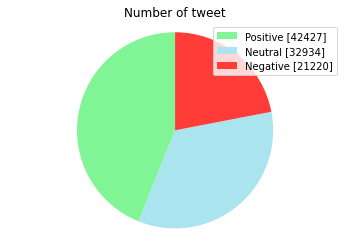

In [32]:
p = 42427
net = 32934
neg = 21220
labels = ['Positive ['+str(p)+']' , 'Neutral ['+str(net)+']','Negative ['+str(neg)+']']
size = [p,net,neg]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(size, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Number of tweet')
plt.axis('equal')
plt.show()

In [135]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = CountVectorizer()

# Melakukan transformasi teks menjadi vektor fitur
X = vectorizer.fit_transform(data['tweet'])

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.3, random_state=1)

# Membuat objek Naive Bayes
naive_bayes = MultinomialNB()

# Melakukan pelatihan model Naive Bayes
training = naive_bayes.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 66.34%


In [136]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
shuffle_split = ShuffleSplit(n_splits=23, test_size=0.1, random_state=2)

# Melakukan cross-validation dengan ShuffleSplit
scores = cross_val_score(naive_bayes, X, data['sentiment'], cv=shuffle_split, scoring='accuracy')

# Menampilkan skor akurasi untuk setiap iterasi cross-validation
for i, score in enumerate(scores):
    print(f"Iterasi {i+1}: {score}")

# Menampilkan rata-rata skor akurasi dari cross-validation
print("Rata-rata skor akurasi: {:.2f} %".format(scores.mean()*100))

Iterasi 1: 0.66097131614373
Iterasi 2: 0.658796727762245
Iterasi 3: 0.6685305995650823
Iterasi 4: 0.6640778709744227
Iterasi 5: 0.6626281453867661
Iterasi 6: 0.6601429015222119
Iterasi 7: 0.6670808739774257
Iterasi 8: 0.6726726726726727
Iterasi 9: 0.6589002795899348
Iterasi 10: 0.6585896241068655
Iterasi 11: 0.6657347002174588
Iterasi 12: 0.6616961789375583
Iterasi 13: 0.6667702184943565
Iterasi 14: 0.6640778709744227
Iterasi 15: 0.6611784197991094
Iterasi 16: 0.6597286942114529
Iterasi 17: 0.6635601118359739
Iterasi 18: 0.6657347002174588
Iterasi 19: 0.6616961789375583
Iterasi 20: 0.6518587553070312
Iterasi 21: 0.6606606606606606
Iterasi 22: 0.6664595630112872
Iterasi 23: 0.6697732214973594
Rata-rata skor akurasi: 66.31 %


In [137]:
acc_mnb = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.4f}".format(acc_mnb))

conf_matrix_mnb = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n {}".format(conf_matrix_mnb))
print(classification_report(y_test, y_pred))

Accuracy: 0.6634
Confusion matrix:
 [[4424 1471  485]
 [2290 4830 2745]
 [1430 1329 9965]]
              precision    recall  f1-score   support

    Negative       0.54      0.69      0.61      6380
     Neutral       0.63      0.49      0.55      9865
    Positive       0.76      0.78      0.77     12724

    accuracy                           0.66     28969
   macro avg       0.64      0.66      0.64     28969
weighted avg       0.67      0.66      0.66     28969



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[4424 1471  485]
 [2290 4830 2745]
 [1430 1329 9965]]


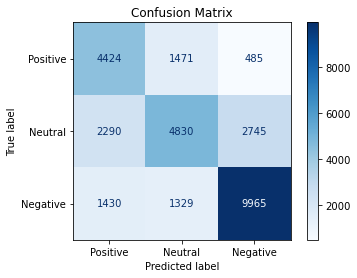

In [138]:
class_names = data['sentiment'].unique()
disp = plot_confusion_matrix(training, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:{:.2f}%".format(accuracy * 100))

# Menghitung dan menampilkan presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi: {:.2f}%".format(precision * 100))

# Menghitung dan menampilkan recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:{:.2f}%".format(recall * 100))

# Menghitung dan menampilkan F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:{:.2f}%".format(f1 * 100))
positive_count = (y_pred == 'Positive').sum()
negative_count = (y_pred == 'Negative').sum()
neutral_count = (y_pred == 'Neutral').sum()
total_count = len(y_pred)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100
    # Tampilkan hasil
print("Persentase Klasifikasi:")
print("Positif: {:.1f}%".format(positive_percentage))
print("Negatif: {:.1f}%".format(negative_percentage))
print("Netral: {:.1f}%".format(neutral_percentage))

Akurasi:72.92%
Presisi: 73.00%
Recall:72.92%
F1-score:72.88%
Persentase Klasifikasi:
Positif: 33.3%
Negatif: 18.8%
Netral: 47.9%


In [126]:
print(y_pred)

['Positive' 'Negative' 'Negative' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Negative' 'Neutral' 'Positive' 'Positive' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Neutral' 'Positive' 'Neutral' 'Negative' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Positive' 'Negative' 'Positive' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Positive' 'Positive' 'Negative' 'Positive' 'Neutral'
 'Positive' 'Neutral' 'Positive' 'Positive' 'Neutral' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Negative' 'Neutral' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Neutral' 'Positive' 'Neutral' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Neutral' 'Neutral' 'Negative' 'Positive'
 'Negative' 'Neutral' 'Neutral' 'Negative' 'Neutral' 'Negative' 'Negative'
 'Neutral' 'Negative' 'Neutral' 'Negative' 'Positive' 'Neutral' 'Negative'
 'Neutral' 'Negative' 'Positive' 'Neutral' 'Neutral' 'Positive' 'Neutral'
 'Neutral' 'Positive' 'Positive' 'Positive' 'Negative' 'Negative'
 'Neut

In [70]:
while True:
    # Memasukkan input teks
    input_text = input("Masukkan teks (atau ketik 'selesai' untuk keluar): ")
    
    # Keluar dari loop jika pengguna memasukkan 'selesai'
    if input_text.lower() == 'selesai':
        break
    
    # Melakukan transformasi teks input menjadi vektor fitur
    X_input = vectorizer.transform([input_text])
    
    # Melakukan prediksi pada input
    pred = naive_bayes.predict(X_input)
    positive_count = (y_pred == 'Positive').sum()
    negative_count = (y_pred == 'Negative').sum()
    neutral_count = (y_pred == 'Neutral').sum()
    total_count = len(y_pred)
    positive_percentage = (positive_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100
    neutral_percentage = (neutral_count / total_count) * 100
    # Tampilkan hasil
    print("Persentase Klasifikasi:")
    print("Positif: {:.2f}%".format(positive_percentage))
    print("Negatif: {:.2f}%".format(negative_percentage))
    print("Netral: {:.2f}%".format(neutral_percentage))
    
    # Menampilkan hasil prediksi
    print("Hasil Prediksi: ", pred[0])
    print()

Persentase Klasifikasi:
Positif: 28.39%
Negatif: 15.48%
Netral: 56.13%
Hasil Prediksi:  Neutral

Persentase Klasifikasi:
Positif: 28.39%
Negatif: 15.48%
Netral: 56.13%
Hasil Prediksi:  Positive

Persentase Klasifikasi:
Positif: 28.39%
Negatif: 15.48%
Netral: 56.13%
Hasil Prediksi:  Negative



In [71]:
data.iloc[45422]

IndexError: single positional indexer is out-of-bounds

In [54]:
while True:
    # Memasukkan input teks
    input_text = input("Masukkan teks (atau ketik 'selesai' untuk keluar): ")
    
    # Keluar dari loop jika pengguna memasukkan 'selesai'
    if input_text.lower() == 'selesai':
        break
    
    # Melakukan transformasi teks input menjadi vektor fitur
    X_input = vectorizer.transform([input_text])
    
    # Melakukan prediksi pada input
    y_pred = naive_bayes.predict(X_input)
    
    # Menampilkan hasil prediksi
    print("Hasil Prediksi: ", y_pred[0])
    print()

Hasil Prediksi:  Neutral

